# Homework 3 - LIME

I've chosen `Alcohol Effects On Study` dataset from Kaggle competition. For this particular homework I've used only `Maths.csv` dataframe.
My prediction model of choice is XGBRegressor which is a tree-based ensemble regression model. 
Model's task is to predict final grade marked as "G3" based on other observations. Target values spans from 0 to 20.  

# (3)

Here is an explanation of a sample that describes a good student.
Good previous grades, relatively low absences were a big factor in making a positive prediction in this sample.

![alt text](lime_good.png "Title")

Here is an explanation of a sample that describes a bad student.
As we can see bad grades and relatively high age makes this model to make a low prediction.

![alt text](lime_bad.png "Title")

To check stability I've made prediction for an average student and then tried to explain it using lime 100 times while changing the seed everytime so the results would differ a bit. Here are two plots, first one of the explanation, second one of the calculated mean and standard deviation of some of the factors, that didn't fit on the legence since it would make this graph unreadable. As we can see in the second figure we can see that higher variance goes hand in hand with low absolute mean and high absolute mean can be frequently paired with low variance. If the question is "Is this explanation stable?" we'd say it depends, most important values are stable, but variables of smaller factor might be inconsistent.

![alt text](lime_avg.png "Title")
![alt text](task3.png "Title")


# (4)

Let's compare SHAP and LIME using the sample of the good student. First figure is SHAP explanation, and the second one is LIME.

![alt text](shap_sample.png "SHAP")
![alt text](lime_good.png "LIME")

As we can see both methods says that in that case "G2", "G1" and "absences" are the features of highest importance in the same order! Unfortunately following features aren't as aligned as the prior ones.

# (6)

Let's compare shap and lime. I'm gonna use examples of good, average and bad student.
In each section, first figure is created usign `XGBRegressor` model and the second figure is made with `LinearRegression` model.


## GOOD

![alt text](lime_good.png "Title")
![alt text](lin_good.png "Title")

## AVERAGE

![alt text](lime_avg.png "Title")
![alt text](lin_avg.png "Title")

## BAD

![alt text](lime_bad.png "Title")
![alt text](lin_bad.png "Title")

## Summary

As we can see while good and bad examples are similar since there is a high chance that good student will remain being good such as bad will remain being bad. But they are similar only in first features and then we can see that these two models perceive this problem totally different. Especially it can be seen on example of the average student where almost every feature is missmatch to the explanation to the other model.

In [1]:
# https://www.kaggle.com/datasets/08163f86754da93458b7dfb3e1c80258069edd817a00db655f3ccc3da37c87b5?resource=download

# Download Maths.csv dataset from this link and put it into notebook directory.

import dalex as dx
import xgboost as xgb
import shap 
import lime

import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
import platform
print(f'Python {platform.python_version()}')
{package.__name__: package.__version__ for package in [dx, xgb, shap, sklearn, pd, np]}

Python 3.10.6


{'dalex': '1.5.0',
 'xgboost': '1.6.2',
 'shap': '0.41.0',
 'sklearn': '1.1.2',
 'pandas': '1.5.1',
 'numpy': '1.23.2'}

# Load data

In [3]:
maths = pd.read_csv('Maths.csv')
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Select samples ids

In [4]:
sample_first = 47
sample_second = 128
sample_third = 28

SAMPLES_IDS = [sample_first, sample_second, sample_third]

# Prepare data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 21
CURRENT = "G3"
categorical_columns = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", 
                       "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
X = maths.drop(columns=CURRENT)
X = pd.get_dummies(X, columns = categorical_columns, drop_first=True)
y = maths[CURRENT]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE)

In [6]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)
name = type(model).__name__
print(f"Accuracy of {name} model:\nTrain set: {train_score}\nTest set: {test_score}")

Accuracy of XGBRegressor model:
Train set: 0.9999999302039252
Test set: 0.8999616768096649


# SHAP

In [7]:
shap_explainer = shap.explainers.Tree(model, data=X)
shap_values = shap_explainer(X)


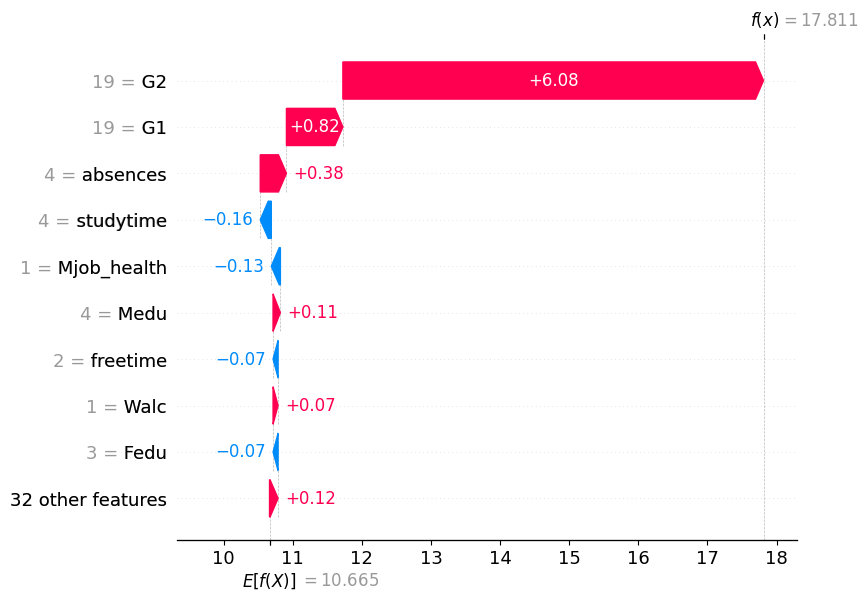

In [8]:
shap.plots.waterfall(shap_values[sample_first])

# Dalex


In [9]:
explainer = dx.Explainer(model, X, y, lambda m, d: m.predict(d))

Preparation of a new explainer is initiated

  -> data              : 395 rows 41 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 395 values
  -> model_class       : xgboost.sklearn.XGBRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function <lambda> at 0x7f0881598f70> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.00121, mean = 10.5, max = 19.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -7.02, mean = -0.0416, max = 2.54
  -> model_info        : package xgboost

A new explainer has been created!


In [10]:
explainer.model_performance()

,mse,rmse,r2,mae,mad
XGBRegressor,0.485552,0.696815,0.976808,0.20071,0.000607


In [11]:
list(map(lambda x: int(x+0.5), explainer.predict(X.iloc[SAMPLES_IDS])))

[18, 0, 11]

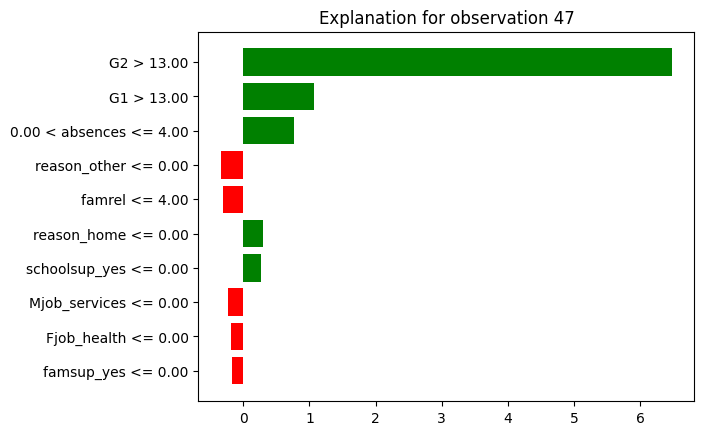

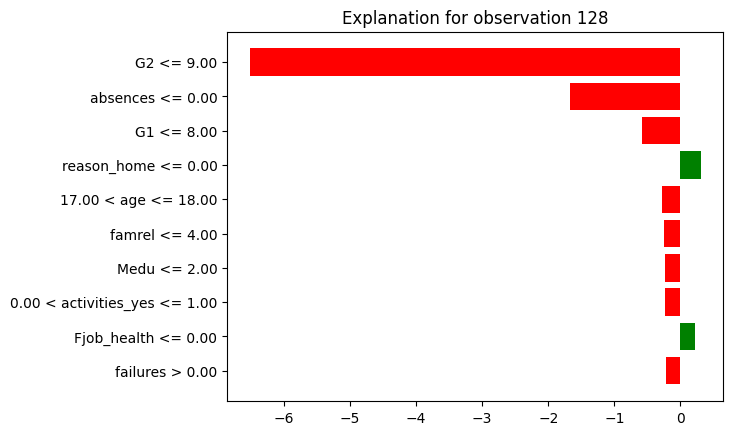

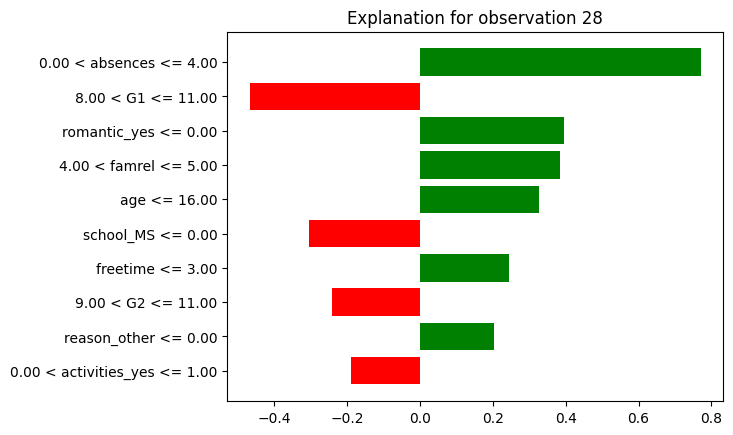

In [12]:
observations = [X.iloc[[i]] for i in SAMPLES_IDS]
explanations = [explainer.predict_surrogate(obs) for obs in observations]

for idx, explanation in zip(SAMPLES_IDS, explanations):
    explanation.plot()
    plt.title(f'Explanation for observation {idx}') 


# Calculating stabilty of lime explanation 

We'll perform explanation for the same sample 100 times while changing seed each time.

In [14]:
import random
import matplotlib.pyplot as plt

data_dict = dict({})
for seed in range(100):
    random.seed(seed)
    np.random.seed(seed)
    exp = explainer.predict_surrogate(observations[2])
    for key, value in exp.as_list():
        if key not in data_dict.keys():
            data_dict[key] = []
        data_dict[key].append(value)

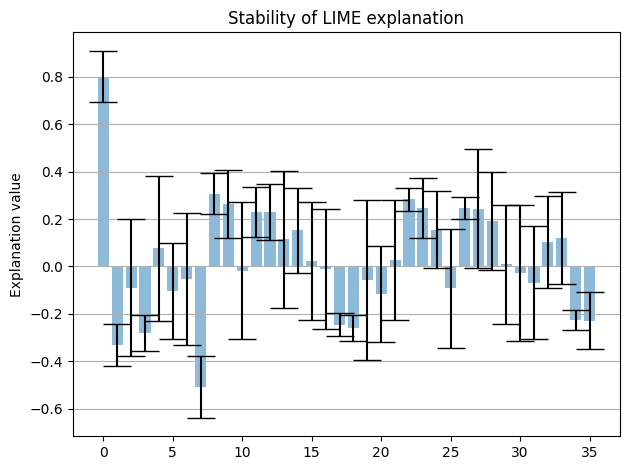

In [15]:
means = [np.mean(np.array(value)) for key, value in data_dict.items()]
stds = [np.std(np.array(value)) for key, value in data_dict.items()]
keys = [key for key, value in data_dict.items()]

# Build the plot
fig, ax = plt.subplots()
ax.bar(range(len(keys)), means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Explanation value')
ax.set_title('Stability of LIME explanation')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()


# Different model


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)
name = type(model).__name__
print(f"Accuracy of {name} model:\nTrain set: {train_score}\nTest set: {test_score}")

Accuracy of LinearRegression model:
Train set: 0.8526127544892745
Test set: 0.8011458417873758


Preparation of a new explainer is initiated

  -> data              : 395 rows 41 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 395 values
  -> model_class       : sklearn.linear_model._base.LinearRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function <lambda> at 0x7f088152ac20> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -2.45, mean = 10.4, max = 20.2
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -7.74, mean = 0.00179, max = 4.9
  -> model_info        : package sklearn

A new explainer has been created!


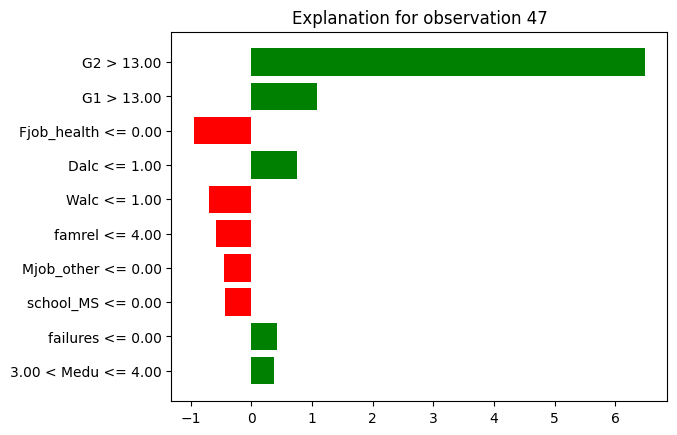

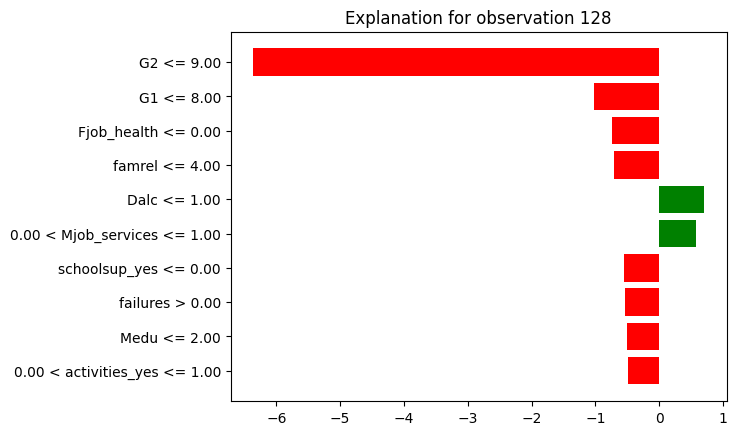

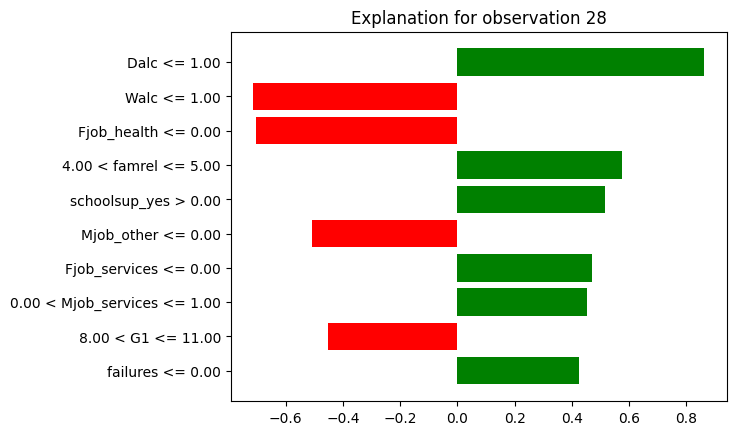

In [17]:
explainer = dx.Explainer(model, X, y, lambda m, d: m.predict(d))
explanations = [explainer.predict_surrogate(obs) for obs in observations]

for idx, explanation in zip(SAMPLES_IDS, explanations):
    explanation.plot()
    plt.title(f'Explanation for observation {idx}') 